In [13]:
a = input("Ingrese un valor")
b = input("Ingrese un segundo valor")
print(int(a)+int(b))

Ingrese un valor2
Ingrese un segundo valor3
5


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.discrete.discrete_model import Probit
from statsmodels.graphics.mosaicplot import mosaic
from itertools import product
from termcolor import colored
from sklearn.preprocessing import StandardScaler

# Data Description 
#### Descripción de las caracteristicas ('features')
- Name: Nombre de la ventana de tiempo
- Netflows: Cantidad de Netflows en la ventana de tiempo
- First Protocol: Top 1 de los protocolos usados en la ventana de tiempo
- Second_Protocol: Top 2 de los  protocolos usados en la ventana de tiempo
- Third_Protocol: Top 3 de los  protocolos usados en la  ventana de tiempo
- P1_d: Percentil: 25% de todas las duraciones en la ventana de tiempo
- P2_d: Percentil:50% de todas las duraciones en la ventana de tiempo
- P3_d: Percentil:75% de todas las duraciones en la ventana de tiempo
- Duration: Duración total de la ventana de tiempo
- Max_d: Valor máximo de todas las duraciones en la ventana de tiempo
- Min_d: Valor mínimo de todas las duraciones en la ventana de tiempo
- Packets: Número total de paquetes en la ventana de tiempo
- Avg_bps: Promedio de bits por segundo en la ventana de tiempo
- Avg_pps: Promedio de paquetes por segundo en la ventana de tiempo
- Avg_bpp: Promedio de bytes por paquete en la ventana de tiempo
- Bytes: Número total de bytes en la ventana de tiempo
- Number_sp: Número total de puertos de origen usados en la ventana de tiempo
- Number_dp: Número total de puertos de destino usados en la ventana de tiempo
- First_sp: Top 1 de los puertos de origen en la ventana de tiempo
- Second_sp: Top 2 de los puertos de origen en la  ventana de tiempo
- Third_sp: Top 3 de los puertos de origen en la ventana de tiempo
- First_dp: Top 1 de los puertos de destino en la ventana de tiempo
- Second_dp: Top 2 de los puertos de destino en la ventana de tiempo
- Third_dp: Top 3 de los puertos de destino en la ventana de tiempo
- P1_ip: Percentil 25% de todas las entradas de paquetes en la ventana de tiempo
- P2_ip: Percentil 50% de todas las entradas de paquetes en la ventana de tiempo
- P3_ip: Percentil 75% de todas las entradas de paquetes en la ventana de tiempo
- P1_ib: Percentil 25% de todas las entradas de bytes en la ventana de tiempo
- P2_ib: Percentil 50% de todas las entradas de bytes en la ventana de tiempo
- P3_ib: Percentil 75% de todas las entradas de bytes en la ventana de tiempo
- Type: Tipo de ventana de tiempo (Minera/No minera)


# Data Load

In [3]:
data = pd.read_csv('./data_identificada.csv')
data.head()

index              Name  Netflows First_Protocol Second_Protocol  \
0   2169  1113-csves/1.csv       400            TCP             UDP   
1    418   214-csves/1.csv        46            UDP             NaN   
2   1293   664-csves/1.csv       189            TCP             UDP   
3    176    29-csves/1.csv         5            TCP             NaN   
4   2171  1114-csves/1.csv        52            TCP             UDP   

  Third_Protocol     p1_d     p2_d       p3_d   duration  ...  second_dp  \
0            NaN    0.000    0.000    9.04175   4287.992  ...       53.0   
1            NaN    0.000    0.000    0.00000      0.000  ...    49129.0   
2            NaN  103.095  104.319  135.17800  20080.306  ...      123.0   
3            NaN   25.023   25.052  243.87800    537.831  ...    52406.0   
4            NaN  127.069  194.800  225.80700   8113.516  ...       80.0   

   third_dp  p1_ip  p2_ip  p3_ip  p1_ib  p2_ib    p3_ib      Type  \
0      80.0   1.00    1.0    5.5   32.0   33.0   873.00  not_mine   
1   47733.0   1.00    1.0    1.0   33.0   49.0   110.75  not_mine   
2      80.0   4.00    4.0    6.0  128.0  128.0   220.00  not_mine   
3   52411.0   3.00    4.0   16.0   60.0  478.0  1540.00      mine   
4    1900.0   5.75    9.0   15.0  224.0  333.5   941.25  not_mine   

   Cryptocurrency  
0   Does not have  
1   Does not have  
2   Does not have  
3         Bitcoin  
4   Does not have  

[5 rows x 33 columns]

### Estructuración del conjunto de datos
Agrupación de las variables cuantitativas y categóricas por separado.

In [4]:
data_numeric = (data.dtypes == "int64") | (data.dtypes == "float64")
data_object  = (data.dtypes == "object")
data_numeric = [c for c in data_numeric.index if data_numeric[c]]
data_object = [c for c in data_object.index if data_object[c]]

In [5]:
data_numeric = ['Netflows', 'p1_d', 'p2_d', 'p3_d', 'duration', 'max_d', 'min_d', '#packets', 'Avg_bps', 'Avg_pps', 'Avg_bpp', '#Bytes', '#sp', '#dp', 'first_sp', 'second_sp', 'third_sp', 'first_dp', 'second_dp', 'third_dp', 'p1_ip', 'p2_ip', 'p3_ip', 'p1_ib', 'p2_ib', 'p3_ib']

In [6]:
data_object = ['First_Protocol','Type','Cryptocurrency']

# Data Inspection

### Variables Categoricas

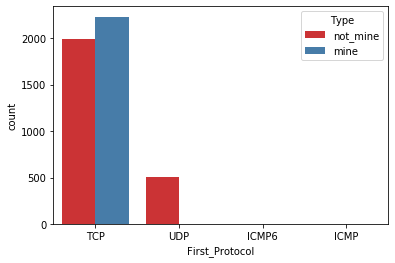

In [7]:
ax = sns.countplot(x = 'First_Protocol', hue='Type', data=data, palette="Set1")

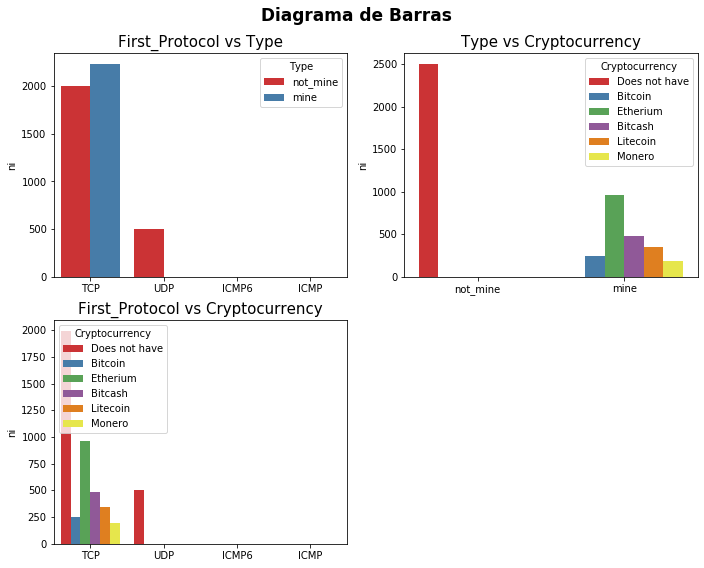

In [8]:
cruce = [('First_Protocol','Type'), ('Type','Cryptocurrency'), ('First_Protocol','Cryptocurrency')]
fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize = (10,8))
ax = ax.flat
for i, tupl in enumerate(cruce):
    sns.countplot(x = tupl[0], hue = tupl[1], data=data, palette="Set1", ax = ax[i])
    ax[i].set_title(tupl[0]+" vs "+tupl[1], size = 15)
    ax[i].tick_params(labelsize = 10)
    ax[i].set_ylabel("ni")
    ax[i].set_xlabel("")

fig.tight_layout()
plt.subplots_adjust(top = 0.9)
fig.suptitle('Diagrama de Barras', fontsize = 17, fontweight = "bold");
fig.delaxes(ax[3])

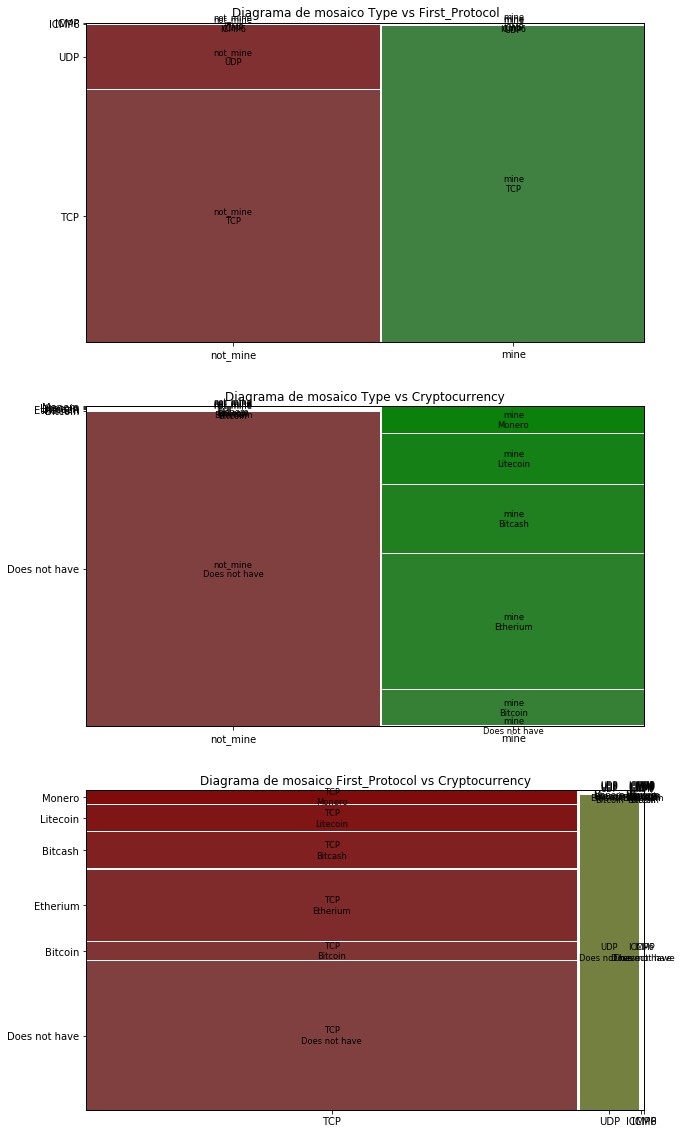

In [9]:
cruce = [('Type','First_Protocol'), ('Type','Cryptocurrency'), ('First_Protocol','Cryptocurrency')]
fig, ax = plt.subplots(nrows = 3, ncols = 1, figsize = (10,20))
ax = ax.flat
for i, tpl in enumerate(cruce):
    a, b = tpl[0], tpl[1] 
    x, y = list(data[a].unique()), list(data[b].unique())
    tuples = list(product(x,y))
    index = pd.MultiIndex.from_tuples(tuples, names=['first', 'second'])
    account = []
   
    for j in range(len(tuples)):
        v = data.loc[(data[a]==tuples[j][0]) & (data[b]==tuples[j][1])].shape[0]
        account.append(v)
    timon = pd.Series(account, index=index)
    mosaic(timon, title= f'Diagrama de mosaico {a} vs {b}', ax=ax[i])   
      

### Variables Cuantitativas

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


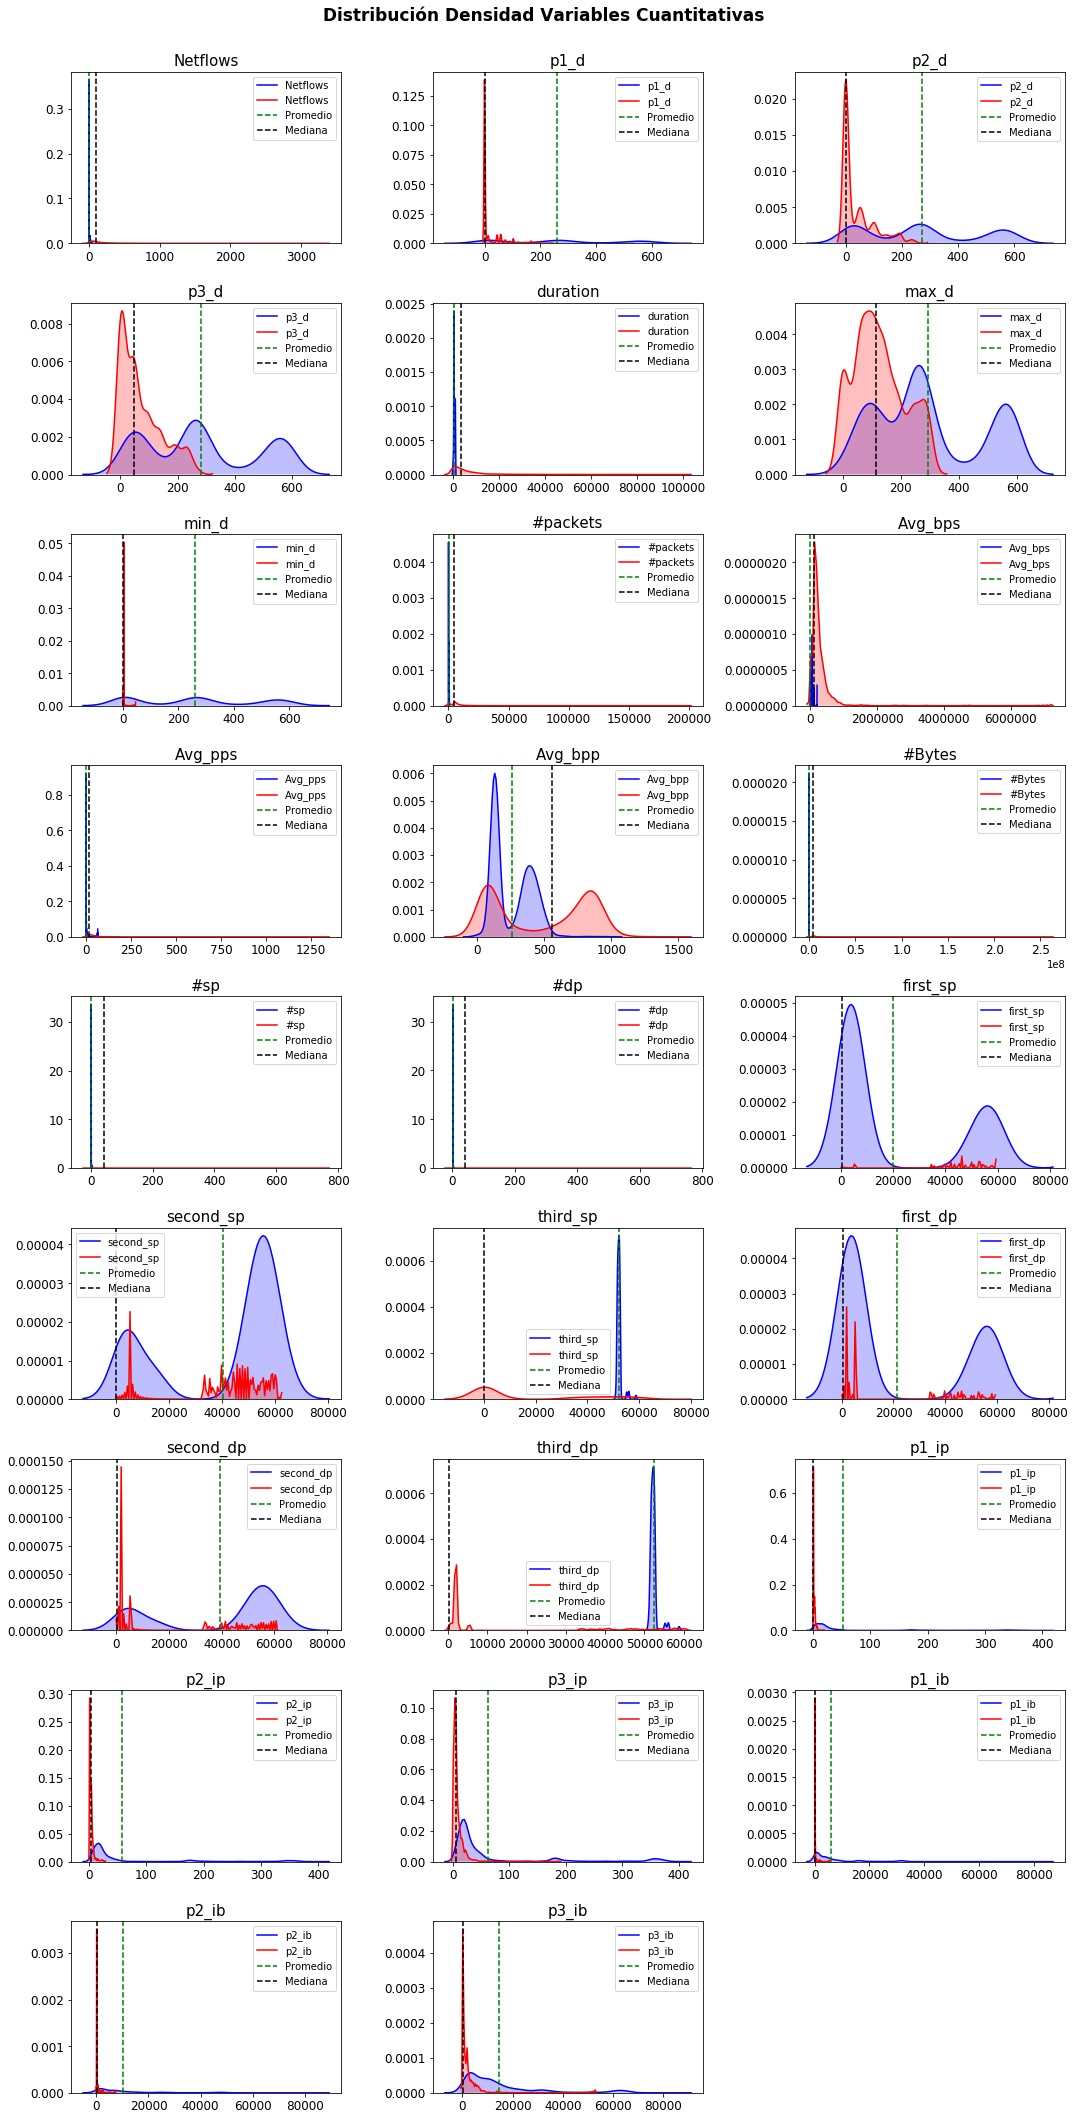

In [10]:
fig, ax = plt.subplots(nrows = 9, ncols = 3, figsize = (15,30))
ax = ax.flat
for i, col in enumerate(data_numeric):
    sns.kdeplot(data[data['Type'] == 'mine'][col], color='blue', shade=True, ax = ax[i])
    sns.kdeplot(data[data['Type'] == 'not_mine'][col], color='red', shade=True, ax = ax[i])
    ax[i].axvline(data[data['Type'] == 'mine'][col].mean(), c='green', linestyle = '--', label = 'Promedio')
    ax[i].axvline(data[data['Type'] == 'not_mine'][col].median(), c='black', linestyle = '--', label = 'Mediana')
    ax[i].set_title(col, size = 15)
    ax[i].tick_params(labelsize = 12)
    ax[i].set_xlabel("", size=9)
    ax[i].legend()
    
fig.tight_layout()
plt.subplots_adjust(top = 0.95)
fig.suptitle('Distribución Densidad Variables Cuantitativas', fontsize = 17, fontweight = "bold");
fig.delaxes(ax[26])

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


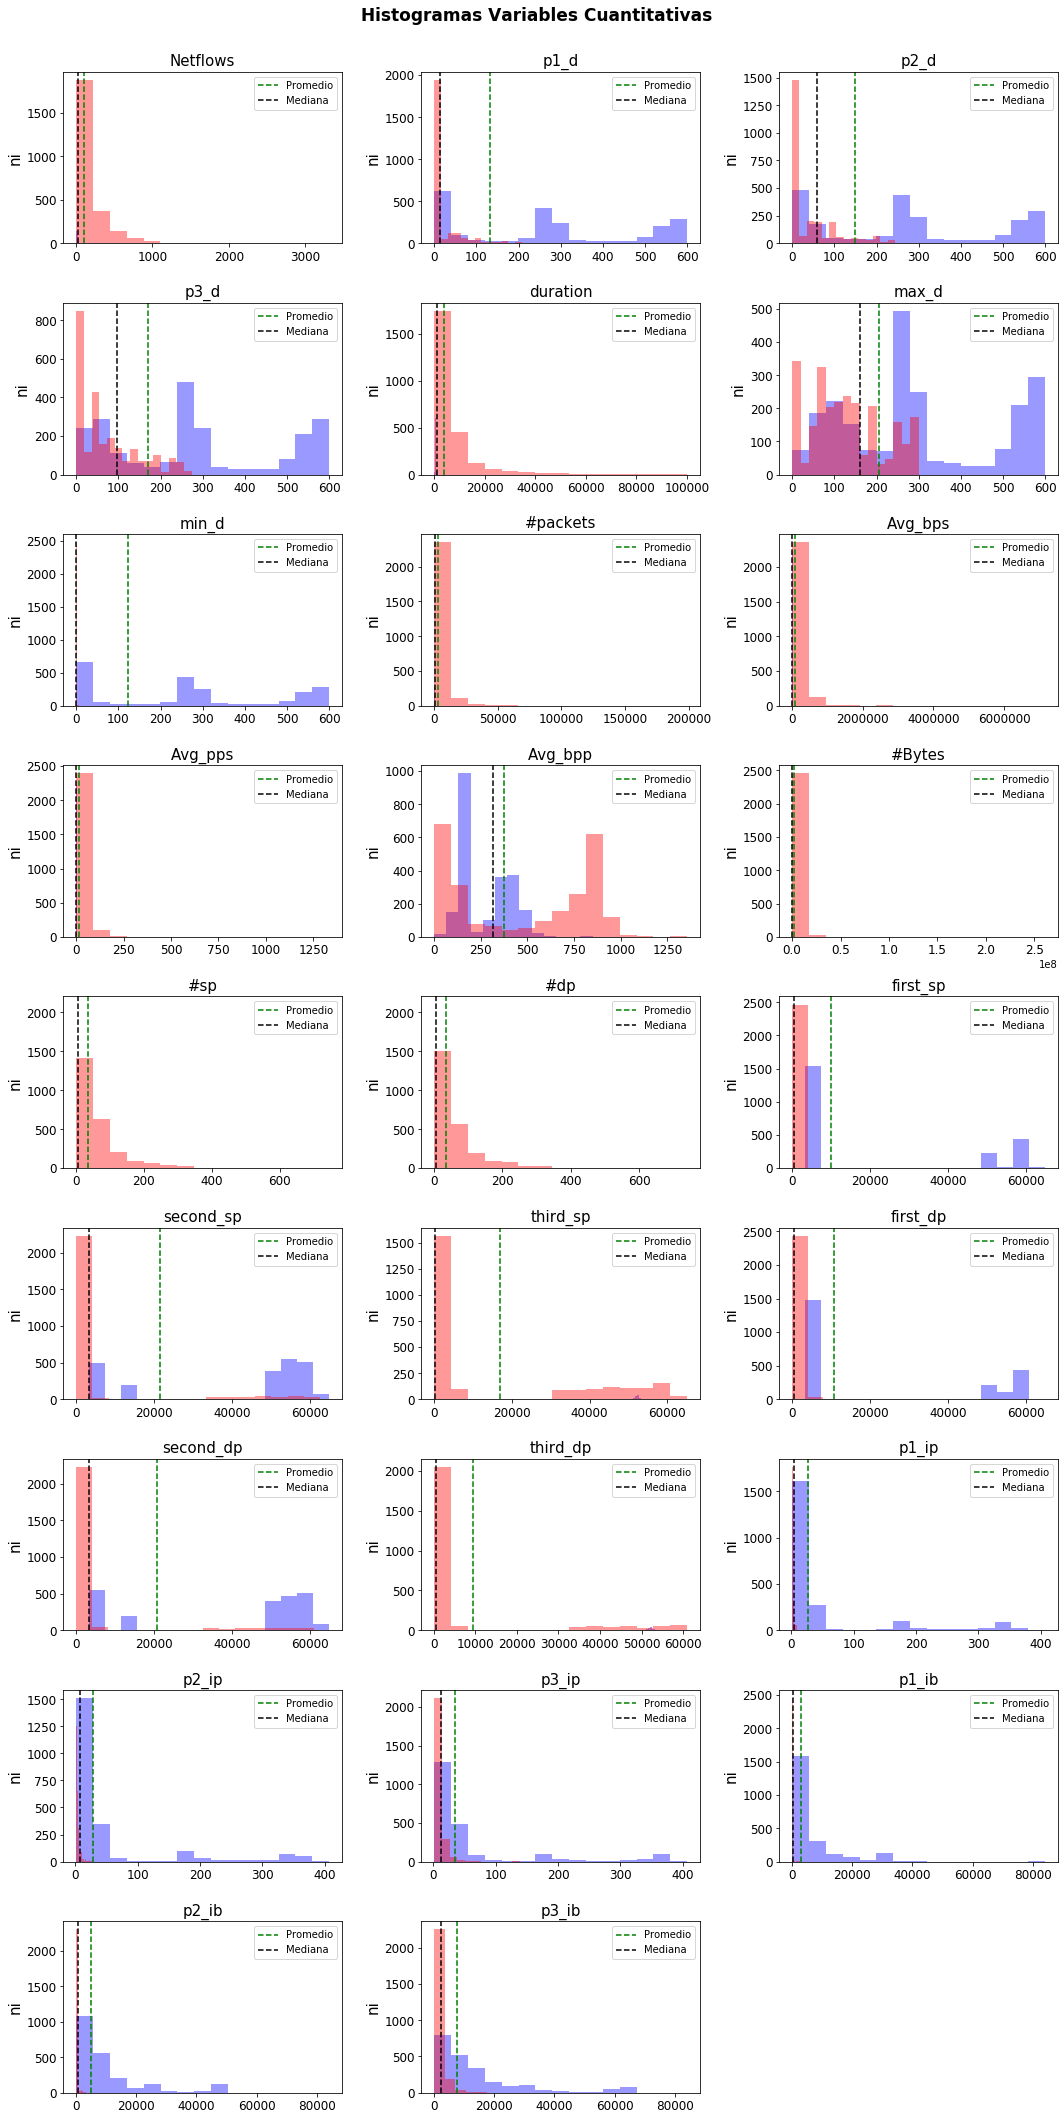

In [11]:
fig, ax = plt.subplots(nrows = 9, ncols = 3, figsize = (15,30))
ax = ax.flat
for i, col in enumerate(data_numeric):
    sns.distplot(data[data['Type'] == 'mine'][col], bins=15,color='blue', kde=False, ax = ax[i])
    sns.distplot(data[data['Type'] == 'not_mine'][col], bins=15,color='red', kde=False, ax = ax[i])
    ax[i].axvline(data[col].mean(), c='green', linestyle = '--', label = 'Promedio')
    ax[i].axvline(data[col].median(), c='black', linestyle = '--', label = 'Mediana')
    
    ax[i].set_title(col, size = 15)
    ax[i].tick_params(labelsize = 12)
    ax[i].set_ylabel('ni',size=15)
    ax[i].set_xlabel("", size=9)
    ax[i].legend()
    
fig.tight_layout()
plt.subplots_adjust(top = 0.95)
fig.suptitle('Histogramas Variables Cuantitativas', fontsize = 17, fontweight = "bold");
fig.delaxes(ax[26])

In [144]:
data_n = pd.concat([data[data_numeric], data['Type']], axis = 1)
data_n.columns

Index(['Netflows', 'p1_d', 'p2_d', 'p3_d', 'duration', 'max_d', 'min_d',
       '#packets', 'Avg_bps', 'Avg_pps', 'Avg_bpp', '#Bytes', '#sp', '#dp',
       'first_sp', 'second_sp', 'third_sp', 'first_dp', 'second_dp',
       'third_dp', 'p1_ip', 'p2_ip', 'p3_ip', 'p1_ib', 'p2_ib', 'p3_ib',
       'Type'],
      dtype='object')

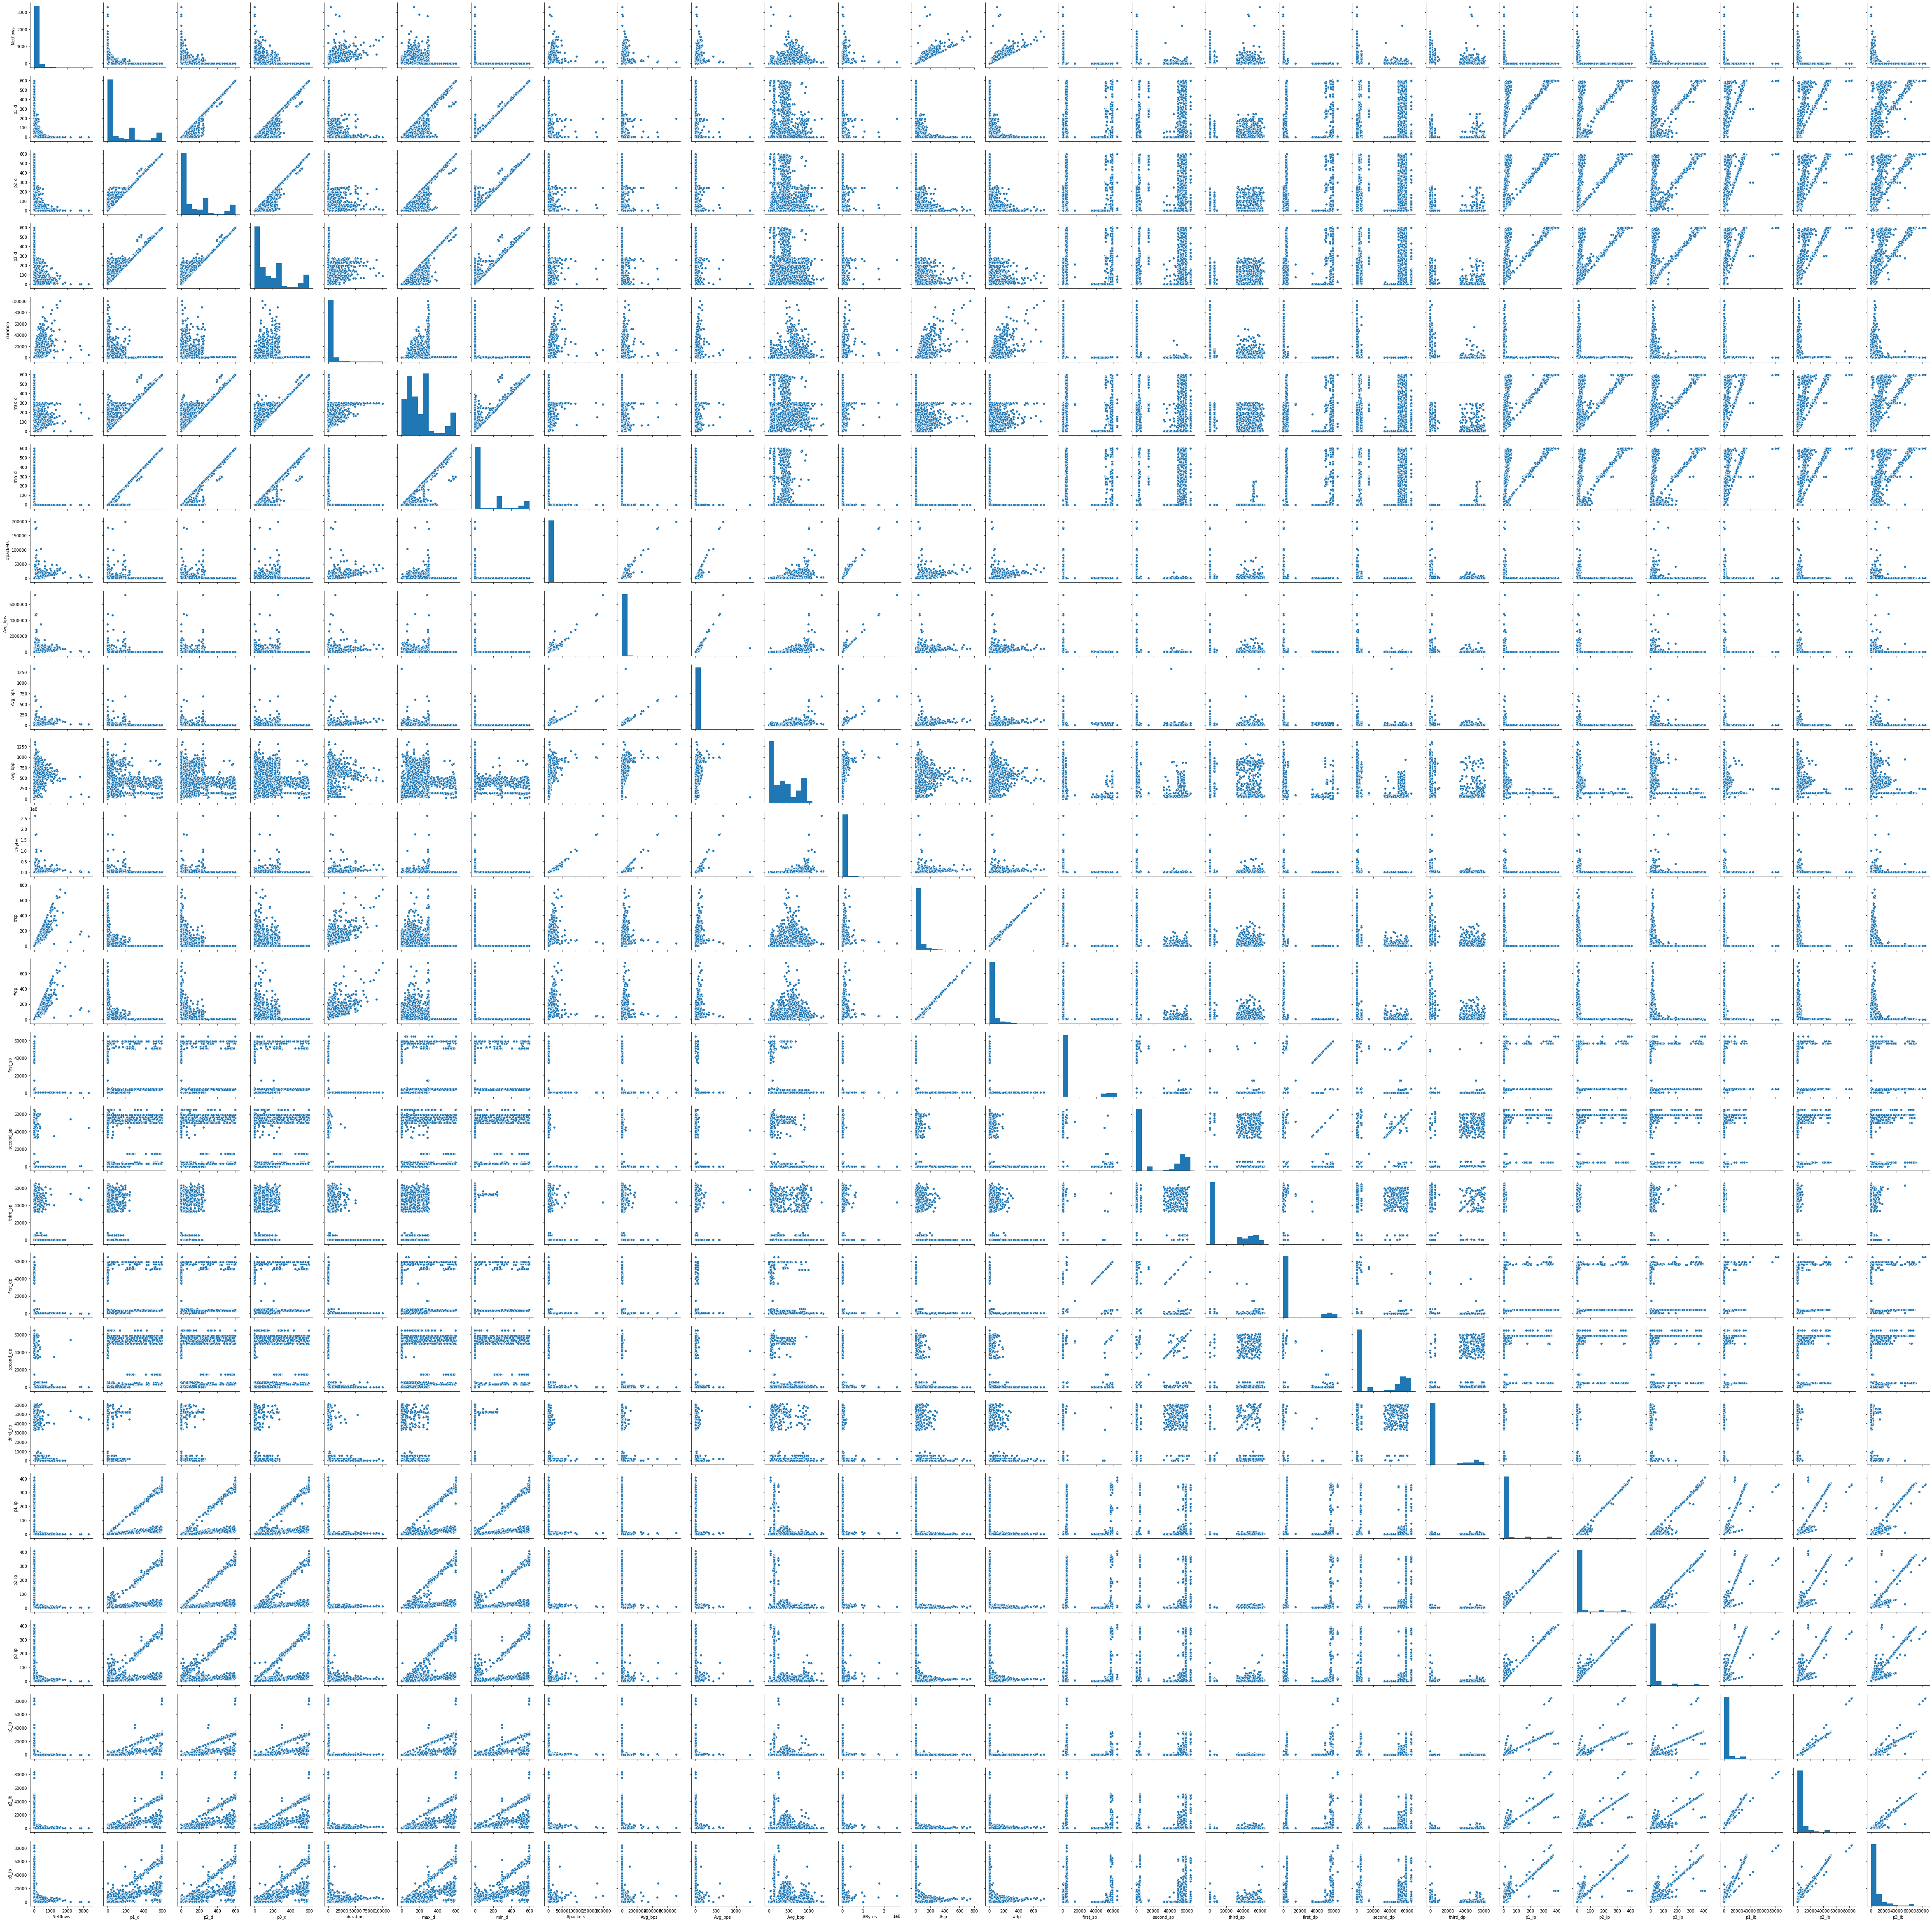

In [145]:
sns.pairplot(data_n)

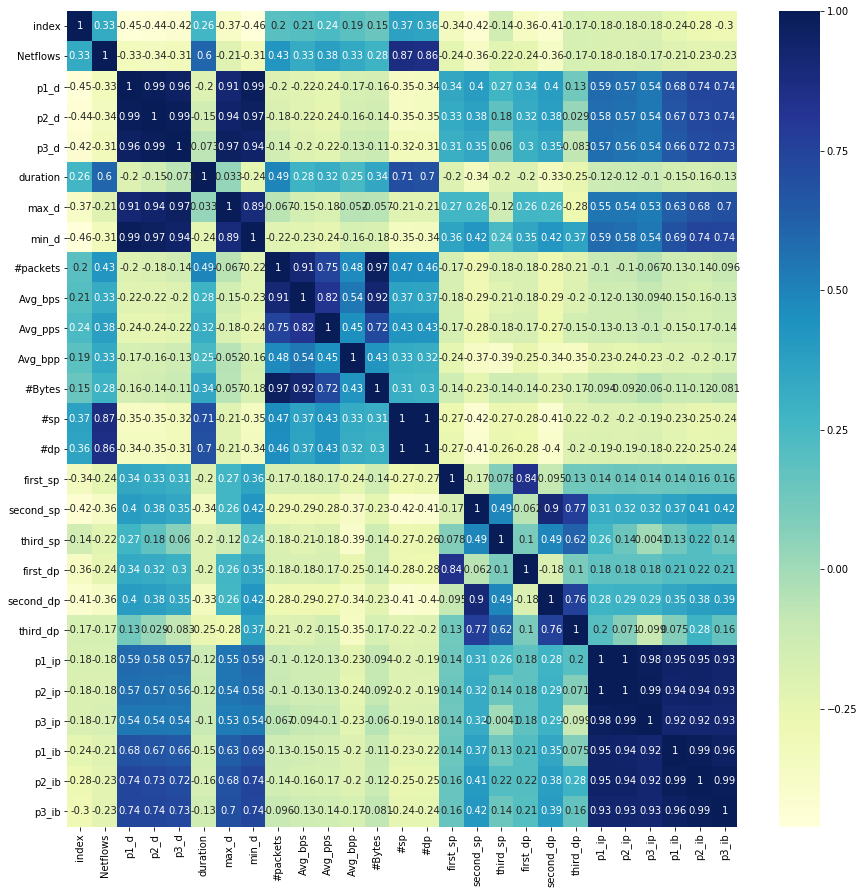

In [146]:
plt.figure(figsize=(15,15))
sns.heatmap(data.corr(), annot=True, cmap="YlGnBu")